In [ ]:
from seaborn.rcmod import palettes
import tensorboard as tb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, f_oneway
from operator import itemgetter

sns.set(rc={'figure.figsize':(12, 9)}, palette="binary_r", style='whitegrid')

In [ ]:
experiment_id = "TBqZnp88QfOqJaWZJom9jA"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

,run,tag,step,value
0,Aug13_16-01-49_MLP-0,Avg. time loss,0,1132.421265
1,Aug13_16-01-49_MLP-0,Avg. time loss,1,1215.797729
2,Aug13_16-01-49_MLP-0,Avg. time loss,2,1180.585327
3,Aug13_16-01-49_MLP-0,Avg. time loss,3,1158.572144
4,Aug13_16-01-49_MLP-0,Avg. time loss,4,1527.035400
...,...,...,...,...
1915,Aug20_16-14-41_NO-AI,Vehicle count,45,448.000000
1916,Aug20_16-14-41_NO-AI,Vehicle count,46,453.000000
1917,Aug20_16-14-41_NO-AI,Vehicle count,47,442.000000
1918,Aug20_16-14-41_NO-AI,Vehicle count,48,454.000000


In [ ]:
runs = [
    'Aug20_13-07-18_MLP-0',
    'Aug20_13-47-43_MLP-1',
    'Aug20_15-48-06_MLP-2',
    'Aug20_16-14-41_NO-AI'
]
latest_df = df[df['run'].isin(runs)].replace({
    "run": {
        runs[0]: "MLP-0",
        runs[1]: "MLP-1",
        runs[2]: "MLP-2",
        runs[3]: "NO-AI"
    }
})
latest_df

,run,tag,step,value
1120,MLP-0,Avg. time loss,0,1212.714478
1121,MLP-0,Avg. time loss,1,1583.882935
1122,MLP-0,Avg. time loss,2,1586.242554
1123,MLP-0,Avg. time loss,3,1554.333252
1124,MLP-0,Avg. time loss,4,1553.914673
...,...,...,...,...
1915,NO-AI,Vehicle count,45,448.000000
1916,NO-AI,Vehicle count,46,453.000000
1917,NO-AI,Vehicle count,47,442.000000
1918,NO-AI,Vehicle count,48,454.000000


## Average time loss

In [ ]:
avg_time_loss = latest_df[latest_df['tag'] == 'Avg. time loss']
avg_time_loss_grouped = avg_time_loss.drop(['step'], axis=1).groupby('run')
avg_time_loss_grouped.describe().round(2)

value                                                             
      count     mean    std      min      25%      50%      75%      max
run                                                                     
MLP-0  50.0  1549.88  57.37  1212.71  1534.72  1553.61  1577.78  1641.71
MLP-1  50.0  1551.53  56.63  1245.06  1529.03  1552.54  1577.25  1661.41
MLP-2  50.0  1355.47  90.43  1205.69  1297.08  1326.21  1408.87  1620.80
NO-AI  50.0  1624.44  60.44  1260.24  1611.73  1636.53  1655.81  1690.32

MLP-0: Is Normal, 0.058090828359127045
MLP-1: Is Normal, 0.05809200555086136
MLP-2: Is Normal, 0.05809194967150688
NO-AI: Is Normal, 0.058092061430215836


[Text(0, 0.5, 'Average time loss (s)'), Text(0.5, 0, 'Run')]

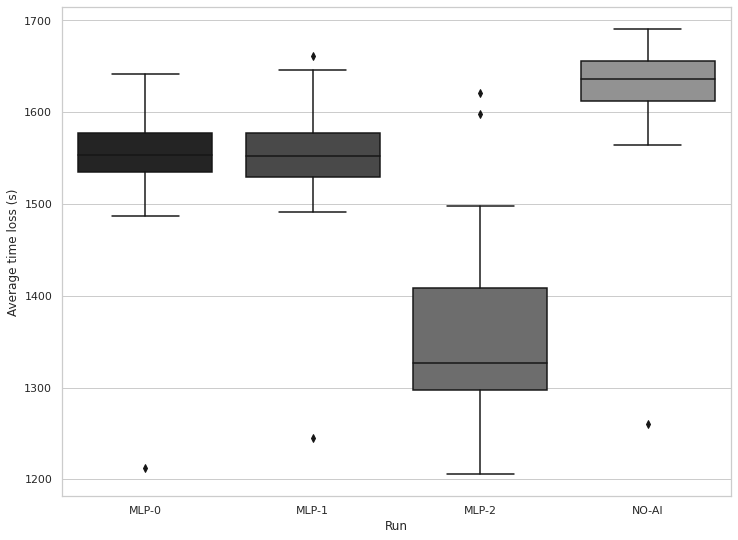

In [ ]:
for group in avg_time_loss_grouped.groups:
    p_value = shapiro(avg_time_loss_grouped.groups[group])[1]
    print(f"{group}: {'Is Normal' if p_value > 0.05 else 'Not Normal'}, {p_value}")

sns.boxplot(x="run", y="value", data=avg_time_loss).set(xlabel="Run", ylabel="Average time loss (s)")

[Text(0, 0.5, 'Average time loss (s)'), Text(0.5, 0, 'Time step')]

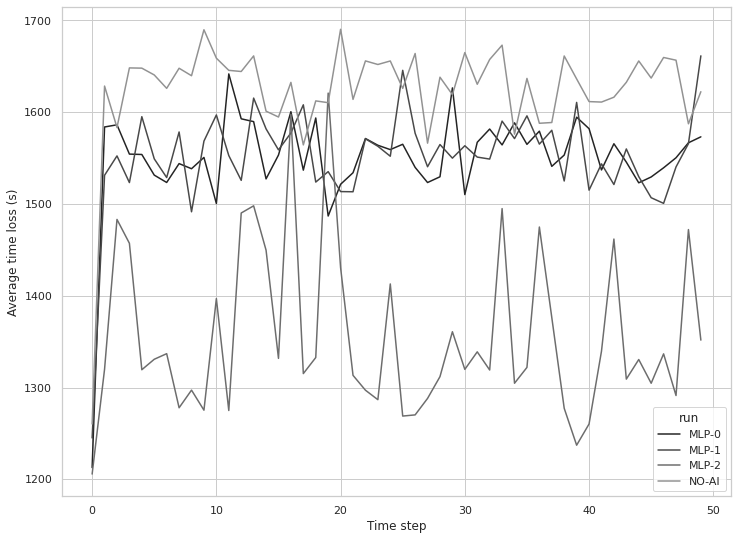

In [ ]:
sns.lineplot(x="step", y="value", hue="run", data=avg_time_loss).set(xlabel="Time step", ylabel="Average time loss (s)")

In [ ]:
m0, m1, m2, no_ai = itemgetter('MLP-0', 'MLP-1', 'MLP-2', 'NO-AI')(avg_time_loss_grouped.groups)
f_oneway(m0, m1, m2, no_ai)

F_onewayResult(statistic=15686.274509803923, pvalue=3.928290721980046e-233)

## Average waiting time

In [ ]:
avg_wait_time = latest_df[latest_df['tag'] == 'Avg. waiting time']
avg_wait_time_grouped = avg_wait_time.drop(['step'], axis=1).groupby('run')
avg_wait_time_grouped.describe().round(2)

value                                                       
      count    mean    std     min     25%     50%     75%     max
run                                                               
MLP-0  50.0  152.05  40.98   88.63  119.59  149.95  174.99  256.28
MLP-1  50.0  159.75  34.60   74.19  146.85  157.76  181.72  228.02
MLP-2  50.0  170.08  35.26   93.29  145.65  169.83  200.32  235.43
NO-AI  50.0  188.14  26.22  130.20  168.29  193.33  204.90  243.28

MLP-0: Is Normal, 0.05808952823281288
MLP-1: Is Normal, 0.058090757578611374
MLP-2: Is Normal, 0.058090705424547195
NO-AI: Is Normal, 0.058090757578611374


[Text(0, 0.5, 'Average waiting time (s)'), Text(0.5, 0, 'Run')]

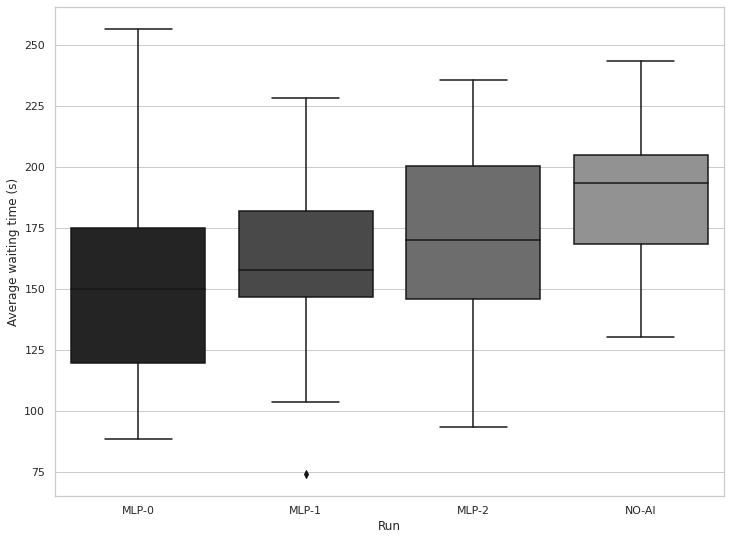

In [ ]:
for group in avg_wait_time_grouped.groups:
    p_value = shapiro(avg_wait_time_grouped.groups[group])[1]
    print(f"{group}: {'Is Normal' if p_value > 0.05 else 'Not Normal'}, {p_value}")

sns.boxplot(x="run", y="value", data=avg_wait_time).set(xlabel="Run", ylabel="Average waiting time (s)")

[Text(0, 0.5, 'Average waiting time (s)'), Text(0.5, 0, 'Time step')]

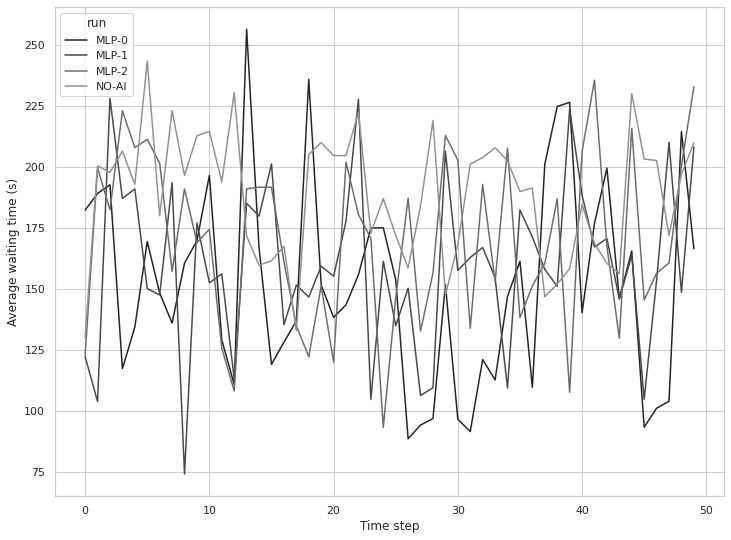

In [ ]:
sns.lineplot(x="step", y="value", hue="run", data=avg_wait_time).set(xlabel="Time step", ylabel="Average waiting time (s)")

In [ ]:
m0, m1, m2, no_ai = itemgetter('MLP-0', 'MLP-1', 'MLP-2', 'NO-AI')(avg_wait_time_grouped.groups)
f_oneway(m0, m1, m2, no_ai)

F_onewayResult(statistic=15686.274509803923, pvalue=3.928290721980046e-233)

## Vehicle count

In [ ]:
vehicle_count = latest_df[latest_df['tag'] == 'Vehicle count']
vehicle_count_grouped = vehicle_count.drop(['step'], axis=1).groupby('run')
vehicle_count_grouped.describe().round(2)

value                                                   
      count    mean    std    min    25%    50%     75%    max
run                                                           
MLP-0  50.0  440.12  12.92  379.0  434.0  442.0  447.00  463.0
MLP-1  50.0  450.50  13.01  383.0  447.0  451.5  458.00  474.0
MLP-2  50.0  399.38  26.91  360.0  383.0  389.0  414.25  466.0
NO-AI  50.0  450.06  12.12  389.0  446.0  451.0  456.75  469.0

MLP-0: Is Normal, 0.058090757578611374
MLP-1: Is Normal, 0.058090705424547195
MLP-2: Is Normal, 0.058090828359127045
NO-AI: Is Normal, 0.058089472353458405


[Text(0, 0.5, 'Vehicle count'), Text(0.5, 0, 'Run')]

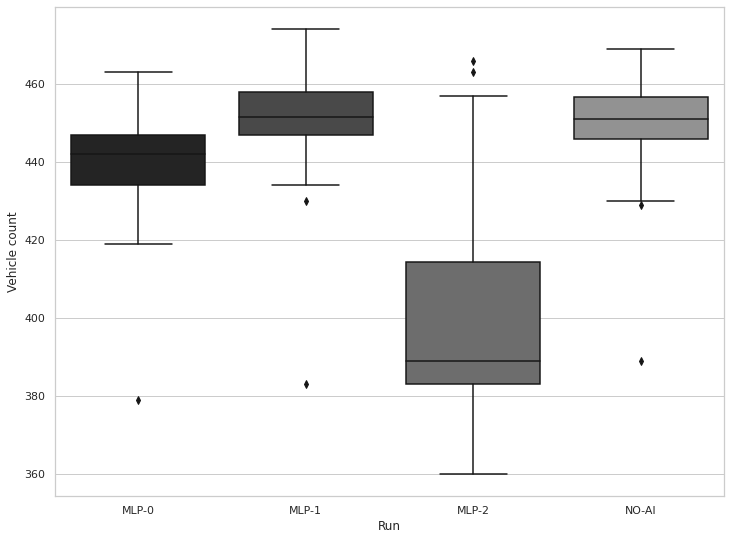

In [ ]:
for group in vehicle_count_grouped.groups:
    p_value = shapiro(vehicle_count_grouped.groups[group])[1]
    print(f"{group}: {'Is Normal' if p_value > 0.05 else 'Not Normal'}, {p_value}")

sns.boxplot(x="run", y="value", data=vehicle_count).set(xlabel="Run", ylabel="Vehicle count")

[Text(0, 0.5, 'Vehicle count'), Text(0.5, 0, 'Time step')]

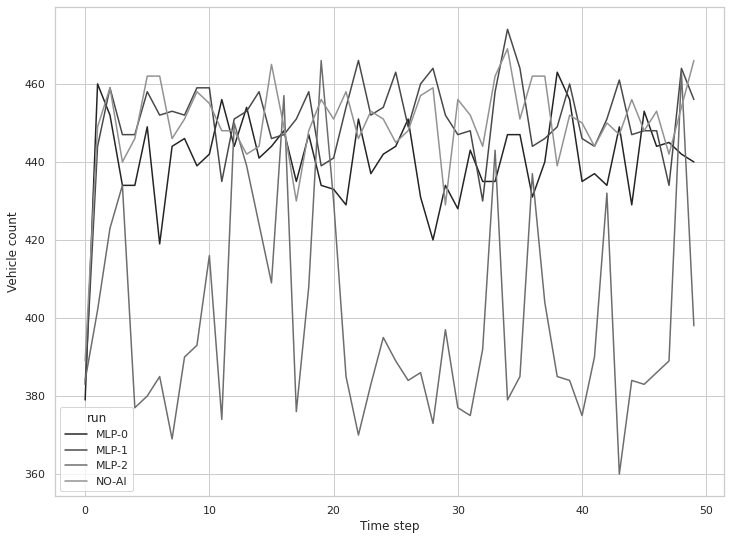

In [ ]:
sns.lineplot(x="step", y="value", hue="run", data=vehicle_count).set(xlabel="Time step", ylabel="Vehicle count")

In [ ]:
m0, m1, m2, no_ai = itemgetter('MLP-0', 'MLP-1', 'MLP-2', 'NO-AI')(vehicle_count_grouped.groups)
f_oneway(m0, m1, m2, no_ai)

F_onewayResult(statistic=15686.274509803923, pvalue=3.928290721980046e-233)

## Episode reward

In [ ]:
eps_reward = latest_df[(latest_df['tag'] == 'Episode reward') & (latest_df['run'] != 'NO-AI')]
eps_reward_grouped = eps_reward.drop(['step'], axis=1).groupby('run')
eps_reward_grouped.describe().round(2)

value                                                              
      count     mean     std      min      25%      50%      75%      max
run                                                                      
MLP-0  50.0  2044.09  507.01  1485.36  1886.41  1991.33  2089.21  5367.29
MLP-1  50.0  2926.75  351.50  1835.32  2763.24  2933.40  3090.48  4300.40
MLP-2  50.0  4084.75  694.66  2269.03  3712.61  4366.30  4574.43  5134.87

MLP-0: Is Normal, 0.058090757578611374
MLP-1: Is Normal, 0.05809194967150688
MLP-2: Is Normal, 0.05809200555086136


[Text(0, 0.5, 'Episode reward'), Text(0.5, 0, 'Run')]

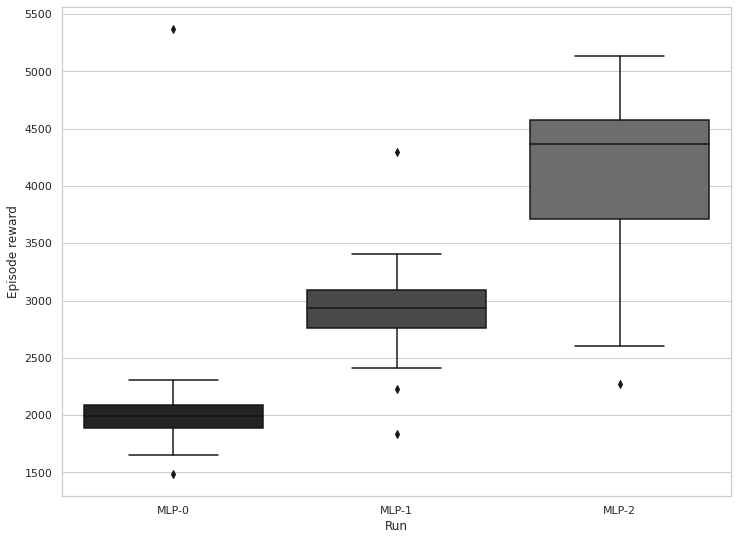

In [ ]:
for group in eps_reward_grouped.groups:
    p_value = shapiro(eps_reward_grouped.groups[group])[1]
    print(f"{group}: {'Is Normal' if p_value > 0.05 else 'Not Normal'}, {p_value}")

sns.boxplot(x="run", y="value", data=eps_reward).set(xlabel="Run", ylabel="Episode reward")

[Text(0, 0.5, 'Episode reward'), Text(0.5, 0, 'Time step')]

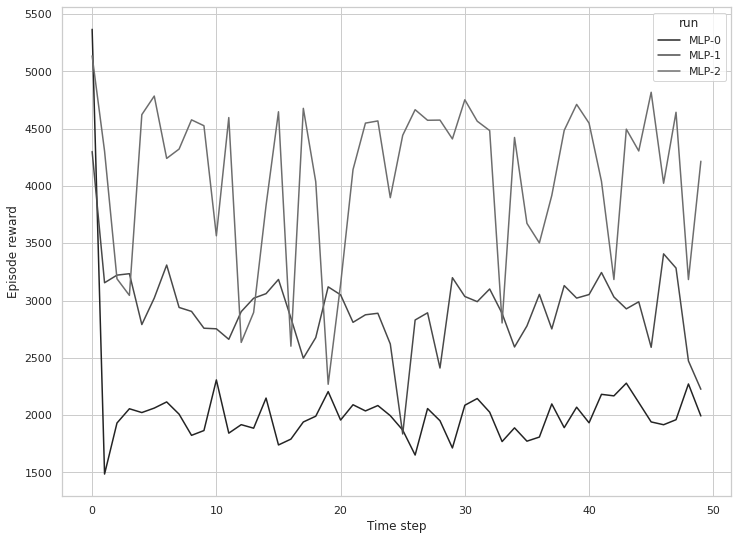

In [ ]:
sns.lineplot(x="step", y="value", hue="run", data=eps_reward).set(xlabel="Time step", ylabel="Episode reward")

In [ ]:
m0, m1, m2 = itemgetter('MLP-0', 'MLP-1', 'MLP-2')(eps_reward_grouped.groups)
f_oneway(m0, m1, m2)

F_onewayResult(statistic=9411.764705882353, pvalue=7.227439414589487e-156)